# Simple Linear Regression

Q NO.1 Predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


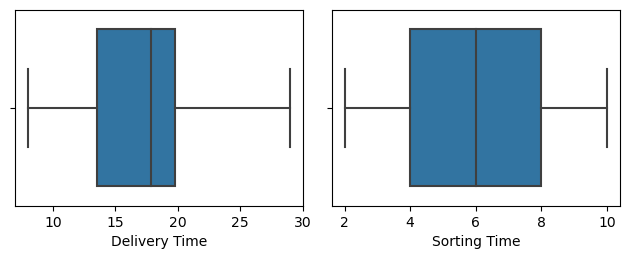

In [5]:
plt.subplot(2,2,1)
sns.boxplot(x = df['Delivery Time'])
plt.subplot(2,2,2)
sns.boxplot(x = df['Sorting Time'])
plt.tight_layout()

In [6]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<Axes: >

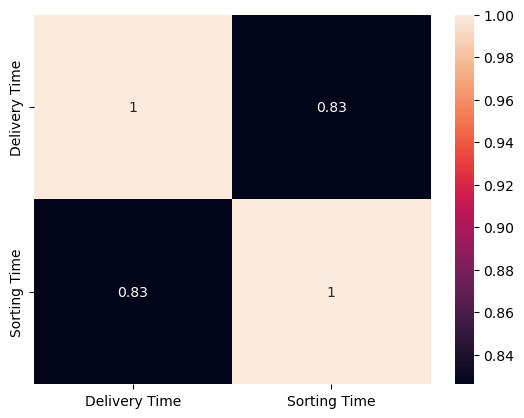

In [7]:
sns.heatmap(df.corr(),annot=True)

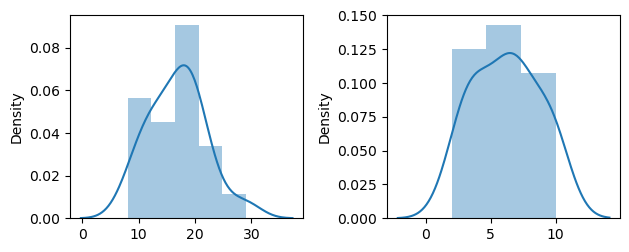

In [8]:
plt.subplot(2,2,1)
sns.distplot(x = df['Delivery Time'])
plt.subplot(2,2,2)
sns.distplot(x = df['Sorting Time'])
plt.tight_layout()

In [14]:
data = df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
# Model Building

In [19]:
import statsmodels.formula.api as smf

model1 = smf.ols("delivery_time ~ sorting_time", data=data).fit()


In [21]:
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [22]:
model1.rsquared,model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [23]:
model2 = smf.ols("np.log(delivery_time) ~ sorting_time", data=data).fit()


In [27]:
model2.rsquared,model2.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

In [25]:
model3 = smf.ols("np.log(delivery_time) ~ np.log(sorting_time)", data=data).fit()

In [28]:
model3.rsquared,model3.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [29]:
model4 = smf.ols("np.sqrt(delivery_time) ~ np.log(sorting_time)", data=data).fit()

In [30]:
model4.rsquared,model4.rsquared_adj

(0.7407394832030242, 0.7270941928452886)

In [31]:
# We will select model3, as it is giving highest accuracy from other models